In [153]:
# load the pandas + numpy libraries
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

# load the pyplot function from the matplotlib library and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf



In [154]:
# load the data set
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Description of Variables

Attribute Information: 

-__0. classes__:                  edible=e, poisonous=p 

-__1. cap-shape__:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
                                  
-__2. cap-surface__:              fibrous=f,grooves=g,scaly=y,smooth=s

-__3. cap-color__:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
                                  
-__4. bruises?__:                 bruises=t,no=f

-__5. odor__:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
                                  
-__6. gill-attachment__:          attached=a,descending=d,free=f,notched=n

-__7. gill-spacing__:             close=c,crowded=w,distant=d

-__8. gill-size__:                broad=b,narrow=n

-__9. gill-color__:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
                                  
-__10. stalk-shape__:              enlarging=e,tapering=t

-__11. stalk-root__:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
                                  
-__12. stalk-surface-above-ring__: fibrous=f,scaly=y,silky=k,smooth=s

-__13. stalk-surface-below-ring__: fibrous=f,scaly=y,silky=k,smooth=s

-__14. stalk-color-above-ring__:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
                                  
-__15. stalk-color-below-ring__:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
                                  
-__16. veil-type__:                partial=p,universal=u

-__17. veil-color__:               brown=n,orange=o,white=w,yellow=y

-__18. ring-number__:              none=n,one=o,two=t

-__19. ring-type__:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
                                  
-__20. spore-print-color__:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
                                  
-__21. population__:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
                                  
-__22. habitat__:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

In [155]:
# how many records in the data set?
data.shape

(8124, 23)

In [156]:
# check the data for null values
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [157]:
#A brief description of the data
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [158]:
#how many edible and poisonous mushroom
data[0].value_counts()

e    4208
p    3916
Name: 0, dtype: int64

## Creation of indicator variables based on your domain knowledge
In real life, we can only judge the shape, smell and color of mushrooms directly and simply. And the brighter the colour of the common mushroom, the heavy the odor, the easier it is to carry toxins.

Hence，we will choose 'odor', 'stalk-shape','stalk-color-above-ring'and'stalk-color-below-ring' as our indicator variables to classfy a mushroom edible or poisonous

## Create a subset pandas DataFrame 
The subset include the 'class' that indicates edible or poisonous, 'odor', 'stalk-shape','stalk-color-above-ring'and'stalk-color-below-ring'. These attributes will be used to do following steps.

In [159]:
# Subset choose
df=data[[0,5,10,14,15]]
df.columns = ['class','odor', 'stalk-shape','stalk-color-above-ring','stalk-color-below-ring']
df.head()

,class,odor,stalk-shape,stalk-color-above-ring,stalk-color-below-ring
0,p,p,e,w,w
1,e,a,e,w,w
2,e,l,e,w,w
3,p,p,e,w,w
4,e,n,t,w,w


In [160]:
#Variables contained in subdata
df.nunique()

class                     2
odor                      9
stalk-shape               2
stalk-color-above-ring    9
stalk-color-below-ring    9
dtype: int64

## Perform exploratory data analysis 

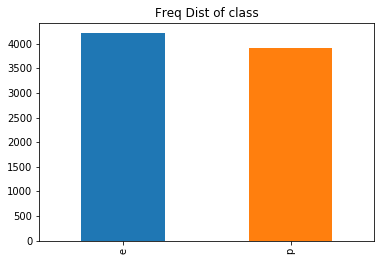

In [161]:
#Distribution of class data
class_ = df['class'].value_counts().plot.bar(title = "Freq Dist of class")
class_

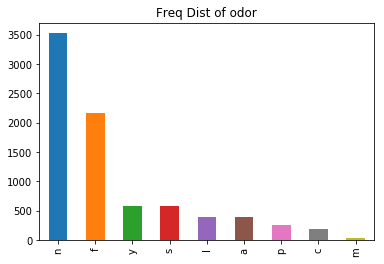

In [162]:
#Distribution of odor data
odor = df['odor'].value_counts().plot.bar(title = "Freq Dist of odor")
odor

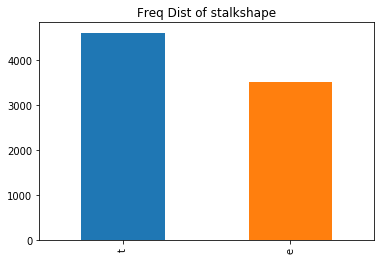

In [163]:
#Distribution of stalk-shape data
stalkshape = df['stalk-shape'].value_counts().plot.bar(title = "Freq Dist of stalkshape")
stalkshape

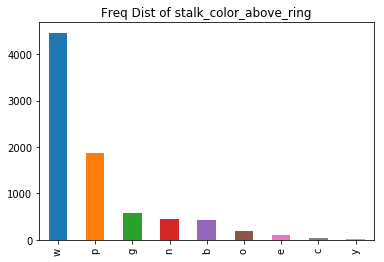

In [164]:
#Distribution of stalk-color-above-ring data
stalk_color_above_ring = df['stalk-color-above-ring'].value_counts().plot.bar(title = "Freq Dist of stalk_color_above_ring")
stalk_color_above_ring

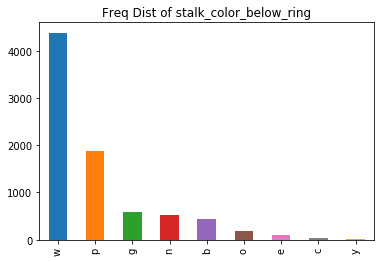

In [165]:
#Distribution of stalk-color-below-ring data
stalk_color_below_ring = df['stalk-color-below-ring'].value_counts().plot.bar(title = "Freq Dist of stalk_color_below_ring")
stalk_color_below_ring

## Convert the “e”/”p” indicators in the first column and each of others to digits

show plots for edible/poisonous vs. odor

In [166]:
#show plots for edible/poisonous vs. odor
df1=pd.get_dummies(df[['class','odor']])
df1=df1.groupby(['class_e','class_p']).sum()
df1

,,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
class_e,class_p,,,,,,,,,
0,1,0.0,192.0,2160.0,0.0,36.0,120.0,256.0,576.0,576.0
1,0,400.0,0.0,0.0,400.0,0.0,3408.0,0.0,0.0,0.0


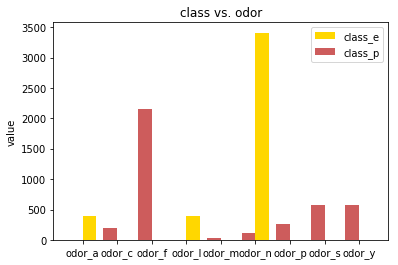

In [167]:
#input original data 
class_e=df1.iloc[1]
class_p=df1.iloc[0]

x =np.arange(len(class_e))# the x locations for the groups
width = 0.4# the width of the bars
 
fig, ax = plt.subplots()
rects1 = ax.bar(x+width/2, class_e, width, color='gold', label='class_e')

rects2 = ax.bar(x-width/2, class_p, width,color='IndianRed', label='class_p')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('class vs. odor')

plt.xticks(x,('odor_a','odor_c','odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y'))
ax.legend()
 
plt.show()

Here we can see that edible mushroom only have relationship with 'odor_a','odor_l','odor_n'; on the other hand, edible mushroom only have relationship with 'odor_c','odor_f','odor_n','odor_m','odor_p','odor_s','odor_y'

show plots for edible/poisonous vs. stalk-shape

In [168]:
#show plots for edible/poisonous vs. stalk-shape
df2=pd.get_dummies(df[['class','stalk-shape']])
df2=df2.groupby(['class_e','class_p']).sum()
df2

,,stalk-shape_e,stalk-shape_t
class_e,class_p,,
0,1,1900.0,2016.0
1,0,1616.0,2592.0


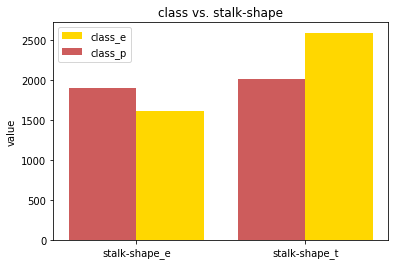

In [169]:
#input original data 
class_e=df2.iloc[1]
class_p=df2.iloc[0]

x =np.arange(len(class_e))# the x locations for the groups
width = 0.4# the width of the bars
 
fig, ax = plt.subplots()
rects1 = ax.bar(x+width/2, class_e, width, color='gold', label='class_e')

rects2 = ax.bar(x-width/2, class_p, width,color='IndianRed', label='class_p')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('class vs. stalk-shape')

plt.xticks(x,('stalk-shape_e','stalk-shape_t'))
ax.legend()
 
plt.show()

In the 'stalk-shape_e', poisonous mushroom is much more than edible mushroom;In the 'stalk-shape_p', poisonous mushroom is less than edible mushroom;

show plots for edible/poisonous vs. stalk-color-above-ring

In [170]:
#show plots for edible/poisonous vs. stalk-color-above-ring
df3=pd.get_dummies(df[['class','stalk-color-above-ring']])
df3=df3.groupby(['class_e','class_p']).sum()
df3

,,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y
class_e,class_p,,,,,,,,,
0,1,432.0,36.0,0.0,0.0,432.0,0.0,1296.0,1712.0,8.0
1,0,0.0,0.0,96.0,576.0,16.0,192.0,576.0,2752.0,0.0


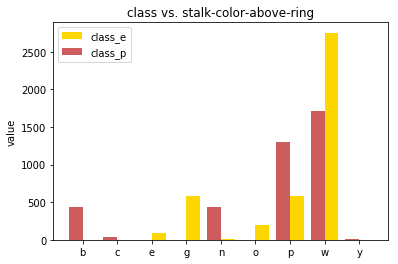

In [171]:
#input original data 
class_e=df3.iloc[1]
class_p=df3.iloc[0]

x =np.arange(len(class_e))# the x locations for the groups
width = 0.4# the width of the bars
 
fig, ax = plt.subplots()
rects1 = ax.bar(x+width/2, class_e, width, color='gold', label='class_e')

rects2 = ax.bar(x-width/2, class_p, width,color='IndianRed', label='class_p')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('class vs. stalk-color-above-ring')

plt.xticks(x,('b','c','e','g','n','o','p','w','y'))
ax.legend()
 
plt.show()

From above picture, we can see edible mushroom only have relationship with 'stalk-color-above-ring_e','stalk-color-above-ring_g','stalk-color-above-ring_n','stalk-color-above-ring_o','stalk-color-above-ring_p' and 'stalk-color-above-ring_w'

show plots for edible/poisonous vs. stalk-color-below-ring

In [172]:
#show plots for edible/poisonous vs. stalk-color-below-ring
df4=pd.get_dummies(df[['class','stalk-color-below-ring']])
df4=df4.groupby(['class_e','class_p']).sum()
df4

,,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y
class_e,class_p,,,,,,,,,
0,1,432.0,36.0,0.0,0.0,448.0,0.0,1296.0,1680.0,24.0
1,0,0.0,0.0,96.0,576.0,64.0,192.0,576.0,2704.0,0.0


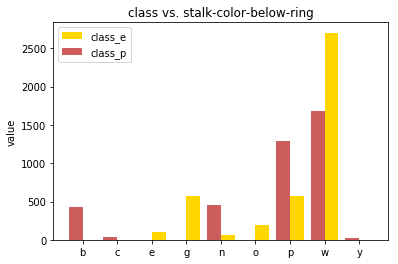

In [173]:
#input original data 
class_e=df4.iloc[1]
class_p=df4.iloc[0]

x =np.arange(len(class_e))# the x locations for the groups
width = 0.4# the width of the bars
 
fig, ax = plt.subplots()
rects1 = ax.bar(x+width/2, class_e, width, color='gold', label='class_e')

rects2 = ax.bar(x-width/2, class_p, width,color='IndianRed', label='class_p')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('class vs. stalk-color-below-ring')

plt.xticks(x,('b','c','e','g','n','o','p','w','y'))
ax.legend()
 
plt.show()

From above picture, we can see edible mushroom only have relationship with 'stalk-color-below-ring_e','stalk-color-below-ring_g','stalk-color-below-ring_n','stalk-color-below-ring_o','stalk-color-below-ring_p' and 'stalk-color-below-ring_w'

## Problem Statement
Use scikit-learn to determine which of the predictor columns that we selected predicts whether or not a mushroom is poisonous. 

In [174]:
#Convert variables to digits
df=pd.get_dummies(df)
df.head()

,class_e,class_p,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,...,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# create X and y
class_e_cols = ['odor_c','odor_f','odor_n','odor_m','odor_p','odor_s','odor_y', 'stalk-shape_e','stalk-shape_t',
                'stalk-color-below-ring_e','stalk-color-below-ring_g','stalk-color-below-ring_n','stalk-color-below-ring_o',
                'stalk-color-below-ring_p' ,'stalk-color-below-ring_w', 'stalk-color-above-ring_e',
                'stalk-color-above-ring_g','stalk-color-above-ring_n','stalk-color-above-ring_o',
                'stalk-color-above-ring_p' ,'stalk-color-above-ring_w'
              ]
X = df[class_e_cols]
y = df.class_e

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the set
model.score(X, y)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9881831610044313

In [176]:
y.mean()

0.517971442639094

In [177]:
# predict class labels for the set
predicted = model.predict(X)
print (predicted)

[0 1 1 ... 1 0 1]


In [178]:
# generate class probabilities
probs = model.predict_proba(X)
print (probs)

[[0.97503219 0.02496781]
 [0.06044862 0.93955138]
 [0.06044862 0.93955138]
 ...
 [0.01231208 0.98768792]
 [0.97740181 0.02259819]
 [0.01231208 0.98768792]]


As you can see, the classifier is predicting a 1 (edible) any time the probability in the second column is greater than 0.9.

Now let's generate some evaluation metrics.

In [179]:
# generate evaluation metrics
print (metrics.accuracy_score(y, predicted))
print (metrics.roc_auc_score(y, probs[:, 1]))

0.9881831610044313
0.998423160126924


In [180]:
print (metrics.confusion_matrix(y, predicted))
print (metrics.classification_report(y, predicted))

[[3820   96]
 [   0 4208]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3916
           1       0.98      1.00      0.99      4208

   micro avg       0.99      0.99      0.99      8124
   macro avg       0.99      0.99      0.99      8124
weighted avg       0.99      0.99      0.99      8124



## conclusion
 From the above analysis, we can see that our regression error is less than 2%. That is to say, we have 98% confidence that if the mushroom smells almond,anise or none and its color is brown，gray,orange,pink,red or white then it is edible.

In [181]:
# create A and b
class_p_cols = ['odor_c','odor_f','odor_m','odor_n','odor_p','odor_s','odor_y', 
                'stalk-shape_e','stalk-shape_t','stalk-color-below-ring_b',
                'stalk-color-below-ring_c','stalk-color-below-ring_n','stalk-color-below-ring_p',
                'stalk-color-below-ring_w' ,'stalk-color-below-ring_y', 'stalk-color-above-ring_b',
                'stalk-color-above-ring_c','stalk-color-above-ring_n','stalk-color-above-ring_p',
                'stalk-color-above-ring_w' ,'stalk-color-above-ring_y']
A = df[class_p_cols]
b = df.class_p

# instantiate a logistic regression model, and fit with A and b
model = LogisticRegression()
model = model.fit(A, b)

# check the accuracy on the set
model.score(A, b)



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9881831610044313

In [182]:
b.mean()

0.48202855736090594

In [183]:
# predict class labels for the set
predicted = model.predict(A)
print (predicted)

[1 0 0 ... 0 1 0]


In [184]:
# generate class probabilities
probsA = model.predict_proba(A)
print (probsA)

[[0.02489778 0.97510222]
 [0.9372696  0.0627304 ]
 [0.9372696  0.0627304 ]
 ...
 [0.976772   0.023228  ]
 [0.02021918 0.97978082]
 [0.976772   0.023228  ]]


As you can see, the classifier is predicting a 1 (poisonous) any time the probability in the second column is greater than 0.9.

Now let's generate some evaluation metrics.

In [185]:
# generate evaluation metrics
print (metrics.accuracy_score(b, predicted))
print (metrics.roc_auc_score(b, probs[:, 1]))

0.9881831610044313
0.0015768398730760412


In [186]:
print (metrics.confusion_matrix(b, predicted))
print (metrics.classification_report(b, predicted))

[[4208    0]
 [  96 3820]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4208
           1       1.00      0.98      0.99      3916

   micro avg       0.99      0.99      0.99      8124
   macro avg       0.99      0.99      0.99      8124
weighted avg       0.99      0.99      0.99      8124



## conclusion
From the above analysis, we can see that our regression error is less than 2%. That is to say, we have 98% confidence that if the mushroom smells creosote,fishy,foul, musty,none,pungent or spicy and its color is brown,buff,cinnamon, pink,white or yellow then it is poisonous.